# Introducation 
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

Data wrangling, which consists of:
 1-Gathering data 
 2-Assessing data
 3-Cleaning data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
#import tweepy 
import json

# Gathering Data

In [4]:
TwitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
TwitterArchive.sort_values('timestamp')
TwitterArchive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [6]:
TwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
Response = requests.get(URL)        # url download 

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(Response.content)

ImagePrediction = pd.read_csv('image-predictions.tsv', sep='\t' )    # read image file

In [8]:
ImagePrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [9]:
import tweepy

ConsumerKey = 'AsdTCNkShaSAMX2dkjcEu73lQ'
ConsumerSecret = 'dwNi62Dh1ZAyng9iz77oiF6ExrDNQIOWLWNmjkaebQvNofyRtm'
AccessToken = '343173544-bHwbFNvVbo1Uvk3SnRrKwldAEL2LeiXrv8YgoCS1'
AccessSecret = 'DCFPky4E05n3G91BUsSoLozARVxCwKNuvXsMsJU567peD'

auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken, AccessSecret)

api = tweepy.API(auth)

In [11]:
ErrorList = []
DfList = []
start = time.time()

for tweet_id in TwitterArchive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        Favorites = tweet['favorite_count'] 
        Retweets = tweet['retweet_count'] 
        UserFollowers = tweet['user']['followers_count'] 
        UserFavourites = tweet['user']['favourites_count'] 
        DateTime = tweet['created_at'] 
        
        DfList.append({'tweet_id': int(tweet_id),
                        'favorites': int(Favorites),
                        'retweets': int(Retweets),
                        'user_followers': int(UserFollowers),
                        'user_favourites': int(UserFavourites),
                        'date_time': pd.to_datetime(DateTime)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        ErrorList.append(tweet_id)

End = time.time()
print(End - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

KeyboardInterrupt: 

In [12]:
print("Result of list", len(DfList))
print("Result of errors ", len(ErrorList))

Result of list 458
Result of errors  16


In [13]:
JsonTweets = pd.DataFrame(DfList, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

JsonTweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)    # CRATE AND SAVE DATAFRAME "LIST OF DICTIONARIES"

In [14]:
# Read the saved tweet_json.txt file into a dataframe
TweetData = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
TweetData

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36940,7873,8496177,143621,2017-08-01 16:23:56+00:00
1,892177421306343426,31783,5844,8496178,143621,2017-08-01 00:17:27+00:00
2,891815181378084864,23952,3859,8496179,143621,2017-07-31 00:18:03+00:00
3,891689557279858688,40266,8042,8496180,143621,2017-07-30 15:58:51+00:00
4,891327558926688256,38460,8702,8496175,143621,2017-07-29 16:00:24+00:00
5,891087950875897856,19346,2897,8496175,143621,2017-07-29 00:08:17+00:00
6,890971913173991426,11275,1913,8496180,143621,2017-07-28 16:27:12+00:00
7,890729181411237888,62281,17586,8496180,143621,2017-07-28 00:22:40+00:00
8,890609185150312448,26615,3995,8496180,143621,2017-07-27 16:25:51+00:00
9,890240255349198849,30458,6840,8496180,143621,2017-07-26 15:59:51+00:00


In [15]:
JsonTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 6 columns):
tweet_id           458 non-null int64
favorites          458 non-null int64
retweets           458 non-null int64
user_followers     458 non-null int64
user_favourites    458 non-null int64
date_time          458 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 21.5 KB


# Summry of Gathering Data

I gather data from read (twitter-archive-enhanced.csv ) file 
and read ( image-predictions.tsv) Image 
and API Twitter devloper 


# Accsessing Data

In [16]:
TwitterArchive  #display file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
ImagePrediction  #display file

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
JsonTweets  #display file

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36940,7873,8496177,143621,2017-08-01 16:23:56+00:00
1,892177421306343426,31783,5844,8496178,143621,2017-08-01 00:17:27+00:00
2,891815181378084864,23952,3859,8496179,143621,2017-07-31 00:18:03+00:00
3,891689557279858688,40266,8042,8496180,143621,2017-07-30 15:58:51+00:00
4,891327558926688256,38460,8702,8496175,143621,2017-07-29 16:00:24+00:00
5,891087950875897856,19346,2897,8496175,143621,2017-07-29 00:08:17+00:00
6,890971913173991426,11275,1913,8496180,143621,2017-07-28 16:27:12+00:00
7,890729181411237888,62281,17586,8496180,143621,2017-07-28 00:22:40+00:00
8,890609185150312448,26615,3995,8496180,143621,2017-07-27 16:25:51+00:00
9,890240255349198849,30458,6840,8496180,143621,2017-07-26 15:59:51+00:00


# 2. Programmatic assessment¶


In [19]:
TwitterArchive.describe()
TwitterArchive['rating_numerator'].value_counts()
TwitterArchive['rating_denominator'].value_counts()
TwitterArchive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Buddy          7
Toby           7
Daisy          7
Bailey         7
Bella          6
Jack           6
Scout          6
Jax            6
Dave           6
Leo            6
Rusty          6
Oscar          6
Koda           6
Milo           6
Stanley        6
Finn           5
            ... 
Rueben         1
Franq          1
Goose          1
Gustaf         1
Devón          1
Molly          1
Jennifur       1
Mark           1
William        1
Vinnie         1
Marvin         1
Ralph          1
Vince          1
Fynn           1
Timofy         1
Alf            1
Stewie         1
Furzey         1
Clyde          1
Arlo           1
Harnold        1
Reagan         1
Katie          1
Anthony        1
Hubertson      1
Noosh          1
Terrenth       1
Mary          

In [20]:
TwitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
TwitterArchive.sum()

tweet_id                                                 -2470820204500040202
in_reply_to_status_id                                             5.81496e+19
in_reply_to_user_id                                               1.57105e+18
timestamp                   2017-08-01 16:23:56 +00002017-08-01 00:17:27 +...
source                      <a href="http://twitter.com/download/iphone" r...
text                        This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                               1.39739e+20
retweeted_status_user_id                                          2.24747e+18
rating_numerator                                                        30926
rating_denominator                                                      24633
name                        PhineasTillyArchieDarlaFranklinNoneJaxNoneZoey...
doggo                       NoneNoneNoneNoneNoneNoneNoneNoneNonedoggoNoneN...
floofer                     NoneNoneNoneNoneNoneNoneNoneNoneNone

In [22]:
TwitterArchive.mean()

tweet_id                    7.427716e+17
in_reply_to_status_id       7.455079e+17
in_reply_to_user_id         2.014171e+16
retweeted_status_id         7.720400e+17
retweeted_status_user_id    1.241698e+16
rating_numerator            1.312649e+01
rating_denominator          1.045543e+01
dtype: float64

In [23]:
TwitterArchive.max()

tweet_id                                                   892420643555336193
in_reply_to_status_id                                             8.86266e+17
in_reply_to_user_id                                               8.40548e+17
timestamp                                           2017-08-01 16:23:56 +0000
source                      <a href="https://about.twitter.com/products/tw...
text                        😂😂😂 10/10 for the dog and the owner https://t....
retweeted_status_id                                               8.87474e+17
retweeted_status_user_id                                          7.87462e+17
rating_numerator                                                         1776
rating_denominator                                                        170
name                                                                     very
doggo                                                                   doggo
floofer                                                         

In [24]:
TwitterArchive.min()

tweet_id                                                   666020888022790149
in_reply_to_status_id                                             6.65815e+17
in_reply_to_user_id                                               1.18563e+07
timestamp                                           2015-11-15 22:32:08 +0000
source                      <a href="http://twitter.com" rel="nofollow">Tw...
text                        "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...
retweeted_status_id                                               6.66104e+17
retweeted_status_user_id                                               783214
rating_numerator                                                            0
rating_denominator                                                          0
name                                                                     Abby
doggo                                                                    None
floofer                                                         

In [25]:
TwitterArchive.duplicated().sum()

0

In [26]:
TwitterArchive[TwitterArchive['rating_numerator'] > 10]

# #For Rating That Don't Follow Pattern


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [27]:
TwitterArchive.source.value_counts()   # NUMBER OF ENRIES OF EACH SOURCE

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
TwitterArchive[TwitterArchive['name'].apply(len) < 6]   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None


In [29]:
JsonTweets.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,4.580000e+02,458.000000,458.000000,4.580000e+02,458.000000
mean,8.498551e+17,18287.591703,5377.755459,8.496235e+06,143621.864629
std,2.258110e+16,16851.940129,5868.668919,9.057942e+01,0.384625
min,8.163367e+17,0.000000,1.000000,8.496175e+06,143621.000000
25%,8.302758e+17,7960.500000,2275.500000,8.496199e+06,143622.000000
50%,8.471367e+17,16222.000000,3718.000000,8.496228e+06,143622.000000
75%,8.697551e+17,24757.000000,6156.500000,8.496251e+06,143622.000000
max,8.924206e+17,136097.000000,44950.000000,8.496957e+06,143623.000000


In [30]:
JsonTweets.sum()

tweet_id           1852028516291408246
favorites                      8375717
retweets                       2463012
user_followers              3891275852
user_favourites               65778814
dtype: int64

In [31]:
JsonTweets.mean()

tweet_id           8.498551e+17
favorites          1.828759e+04
retweets           5.377755e+03
user_followers     8.496235e+06
user_favourites    1.436219e+05
dtype: float64

In [32]:
JsonTweets.duplicated().sum()

0

In [33]:
ImagePrediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
ImagePrediction.info()
ImagePrediction['jpg_url'].value_counts()
ImagePrediction[ImagePrediction['jpg_url'] == 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [35]:
ImagePrediction.sum()

tweet_id                               1532286567543998047538
jpg_url     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jp...
img_num                                                  2498
p1          Welsh_springer_spanielredboneGerman_shepherdRh...
p1_conf                                               1233.69
p1_dog                                                   1532
p2          collieminiature_pinschermalinoisredboneRottwei...
p2_conf                                               279.271
p2_dog                                                   1553
p3          Shetland_sheepdogRhodesian_ridgebackbloodhound...
p3_conf                                               125.173
p3_dog                                                   1499
dtype: object

In [36]:
ImagePrediction.mean()

tweet_id    7.384514e+17
img_num     1.203855e+00
p1_conf     5.945483e-01
p1_dog      7.383133e-01
p2_conf     1.345886e-01
p2_dog      7.484337e-01
p3_conf     6.032417e-02
p3_dog      7.224096e-01
dtype: float64

In [37]:
ImagePrediction.duplicated().sum()

0

# Summry of Access Data

from the result above :

1-TwitterArchive file ~  2356 rows × 17 columns
   1- 0 duplicat of "TwitterArchive"
tweet_id: the unique identifier for each tweet
in_reply_to_status_id: if the represented Tweet is a reply
in_reply_to_user_id: if the represented Tweet is a reply
timestamp: time when this Tweet was created
source: utility used to post the Tweet, as an HTML-formatted string 
text: actual UTF-8 text of the status update
retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
retweeted_status_timestamp: time of retweet
expanded_urls: tweet URL
rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
name: name of the dog (doggo , floofer , pupper ,puppo)

2-ImagePrediction file   ~ 2075 rows × 12 columns
   1- 0 duplicat of "ImagePrediction"

3-JsonTweets file ~ 500 rows × 6 columns
   1- 0 duplicat of "JsonTweets"



# Clean

In [38]:
CleanTwitterArchive = TwitterArchive.copy()

### Define 

Keeping those rows in TwitterArchive table that are original tweets ,not retweets  Delete the rest

#####  Code

In [39]:
CleanTwitterArchive = CleanTwitterArchive[CleanTwitterArchive.retweeted_status_id.isnull()]

#####  Test

In [40]:
len(CleanTwitterArchive[CleanTwitterArchive.retweeted_status_id.isnull() == False])

0

#### Tidiness

TwitterArchive without duplicates  dropp EMPTY retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp

In [41]:
CleanTwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [42]:
CleanTwitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


In [72]:
CleanTwitterArchive = CleanTwitterArchive[CleanTwitterArchive.tweet_id.isin(ImagePrediction.tweet_id)]

In [73]:
len(CleanTwitterArchive[~CleanTwitterArchive.tweet_id.isin(ImagePrediction.tweet_id)])

0

#### Define 

Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp 

######  Code

In [43]:
CleanTwitterArchive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                         axis=1, inplace=True)

######  Test

In [44]:
CleanTwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 178.4+ KB


In [45]:
CleanTwitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,170.000000


In [74]:
CleanTwitterArchive.in_reply_to_status_id = CleanTwitterArchive.in_reply_to_status_id.fillna(0)
CleanTwitterArchive.in_reply_to_user_id = CleanTwitterArchive.in_reply_to_user_id.fillna(0)

CleanTwitterArchive.in_reply_to_status_id = CleanTwitterArchive.in_reply_to_status_id.astype(np.int64)
CleanTwitterArchive.in_reply_to_user_id = CleanTwitterArchive.in_reply_to_user_id.astype(np.int64)

CleanTwitterArchive.timestamp = pd.to_datetime(CleanTwitterArchive.timestamp)

In [75]:
CleanTwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null object
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns, UTC](1), int64(4), object(9)
memory usage: 163.6+ KB


In [76]:
CleanTwitterArchive.source = CleanTwitterArchive.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [77]:
CleanTwitterArchive.source = CleanTwitterArchive.source.astype('category')

In [78]:
CleanTwitterArchive.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [79]:
print(CleanTwitterArchive.iloc[0].text)
print(CleanTwitterArchive.iloc[1].text)
print(CleanTwitterArchive.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [87]:
CleanTwitterArchive['breed'] = 'None'
CleanTwitterArchive['retweet_count'] = 0
CleanTwitterArchive['favorite_count'] = 0

In [93]:
# iterate through all the rows of archive_clean
for i, row in CleanTwitterArchive.iterrows():
    # fetch the retweet_count and favorite_count columns of status_df table and assign those values
    #CleanTwitterArchive.set_value(i, 'retweet_count', JsonTweets[JsonTweets.tweet_id == row.tweet_id].retweet_count.iloc[0])
    #CleanTwitterArchive.set_value(i, 'favorite_count', JsonTweets[JsonTweets.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    
    img_prediction = ImagePrediction[ImagePrediction.tweet_id == row.tweet_id]
    p1_conf = img_prediction.p1_conf.iloc[0]
    p1_dog = img_prediction.p1_dog.iloc[0]
    #  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
    if p1_conf >= 0.95 and p1_dog:
        CleanTwitterArchive.set_value(i, 'breed', img_prediction.p1.iloc[0])

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


####  Define 
View all occurences where there are more than one #/# in 'text' 

#####  Code 

In [46]:
TextRatingsToFix = CleanTwitterArchive[CleanTwitterArchive.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

TextRatingsToFix

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


55      @roushfenway These are good dogs but 17/10 is ...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
766     "Yep... just as I suspected. You're not flossi...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1832    These two pups just met and have instantly bon...
1897    Meet R

In [110]:
CleanTwitterArchive['name'][CleanTwitterArchive['name'].str.match('[a-z]+')] = 'None'

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
CleanTwitterArchive.name[CleanTwitterArchive.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [115]:
CleanTwitterArchive.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

#####  Test

In [47]:
import re
for entry in TextRatingsToFix:
    mask = CleanTwitterArchive.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    CleanTwitterArchive.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    CleanTwitterArchive.loc[mask, column_name2] = 10

In [48]:
CleanTwitterArchive[CleanTwitterArchive.text.isin(TextRatingsToFix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,13,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11,10,None,None,None,None,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,None,None,None,None


#### Define

View tweets with decimals in rating in 'text' 


#####  Code

In [49]:
CleanTwitterArchive[CleanTwitterArchive.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


#####  Test

In [50]:
CleanTwitterArchive[CleanTwitterArchive.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [51]:
CleanTwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null object
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 169.9+ KB


In [52]:
CleanTwitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,10.477241
std,6.748668e+16,7.582492e+16,1.252797e+17,6.958764
min,6.660209e+17,6.658147e+17,1.185634e+07,7.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,170.000000


# Store data and Acting on Wrangled Data

In [117]:
CleanTwitterArchive.to_csv('TwitterArchiveMaster.csv', encoding='utf-8', index=False)


In [118]:
df = CleanTwitterArchive.copy()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null object
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
breed                    1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), int64(6), object(9)
memory usage: 196.7+ KB


In [120]:
df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')
df['dog_gender'] = df['dog_gender'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

KeyError: 'dog_stage'

In [121]:
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	0
Mean Favorite Count	0


In [122]:
import time
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts()

2015-12    367
2015-11    296
2016-01    169
2016-03    120
2016-02    111
2016-07     88
2016-06     81
2017-01     66
2016-10     65
2017-02     64
2016-09     63
2016-08     59
2016-05     57
2016-04     54
2016-12     54
2016-11     53
2017-07     49
2017-03     48
2017-06     44
2017-05     43
2017-04     41
2017-08      2
Name: timestamp, dtype: int64

In [123]:
df['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [124]:
df['rating_numerator'].value_counts()

12      449
10      408
11      393
13      261
9       149
8        93
7        50
14       35
6        32
5        31
3        19
4        14
2         9
8         5
7         4
10        4
11        4
1         4
0         2
13        2
4         2
2         1
24        1
26        1
27        1
1776      1
44        1
121       1
9         1
204       1
420       1
165       1
5         1
144       1
143       1
6         1
1         1
99        1
14        1
88        1
84        1
80        1
75        1
60        1
45        1
Name: rating_numerator, dtype: int64

In [125]:
df['rating_numerator'][df['rating_numerator'] ].value_counts()

13    1524
12     288
14     149
5        1
Name: rating_numerator, dtype: int64

In [126]:
df['rating_denominator'].value_counts()

10     1981
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
7         1
Name: rating_denominator, dtype: int64

In [127]:
df['rating_denominator'][df['rating_denominator'] ].value_counts()

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


10.0    1992
Name: rating_denominator, dtype: int64

In [128]:
df['name'].value_counts()

None        644
Charlie      11
Lucy         10
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          7
Daisy         7
Toby          7
Jax           6
Bo            6
Koda          6
Stanley       6
Bella         6
Oscar         5
Buddy         5
Louis         5
Leo           5
Scout         5
Chester       5
Rusty         5
Dave          5
Milo          5
Bailey        5
Dexter        4
Larry         4
Maggie        4
           ... 
Pablo         1
Klein         1
Kody          1
Claude        1
Tuco          1
Pubert        1
Jangle        1
Franq         1
Tedrick       1
Rueben        1
Crouton       1
Tebow         1
Harper        1
Bradley       1
Gert          1
Darla         1
Toffee        1
Wishes        1
Astrid        1
Dwight        1
Karl          1
Stewie        1
Fiji          1
Dawn          1
Barclay       1
Zara          1
Stuart        1
Vinscent      1
Keurig        1
Patch         1
Name: name, Length: 914,

# Data Visualizing 

In [129]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

In [130]:
matplotlib.style.use('ggplot')

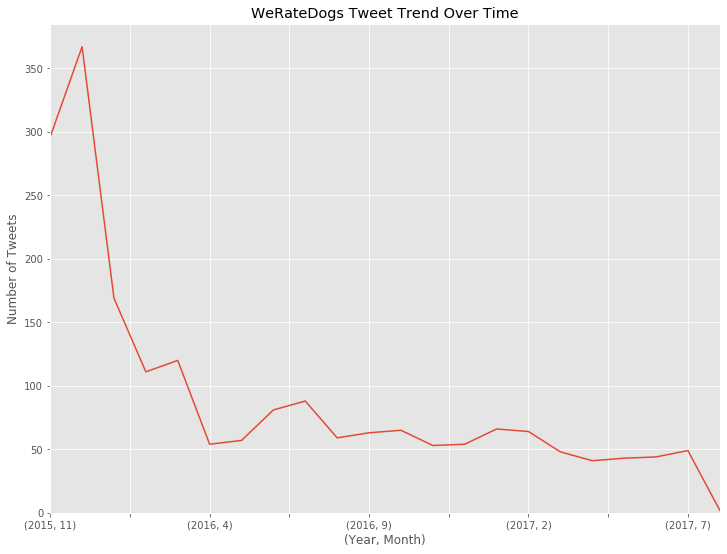

In [131]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs Tweet Trend Over Time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

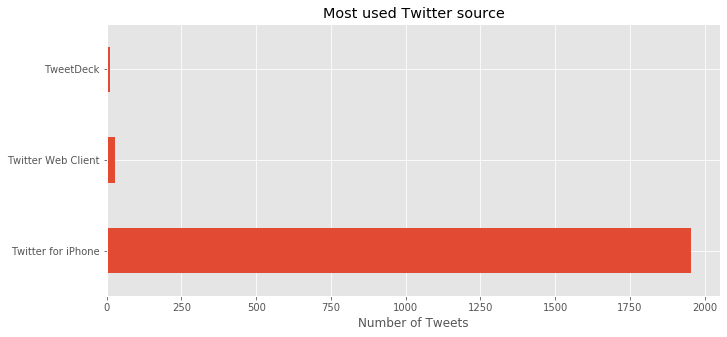

In [132]:
df['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

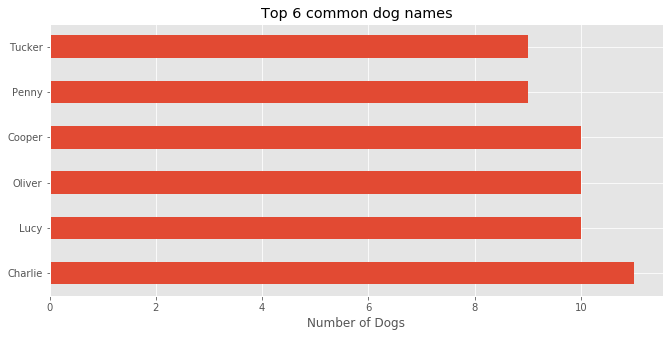

In [133]:
df.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

Text(0.5, 1, 'Correlation Map')

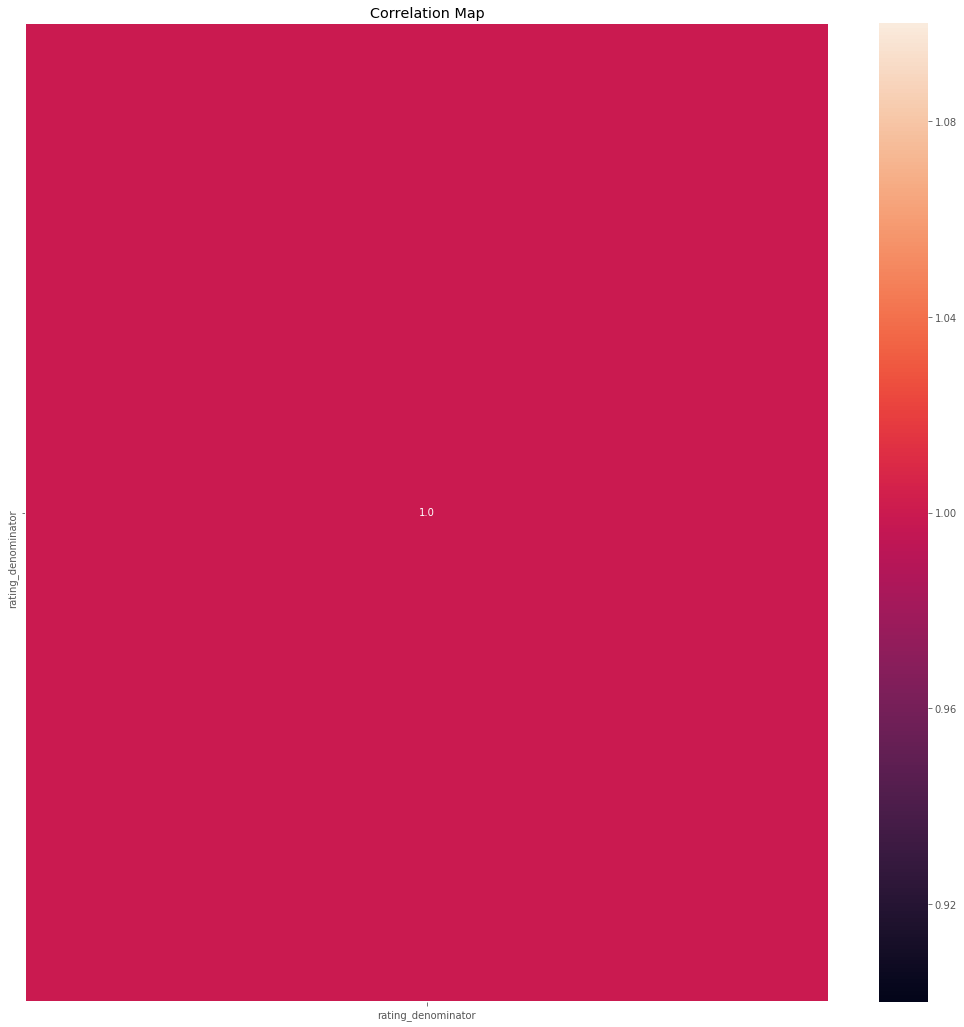

In [147]:
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[['rating_denominator', 'timestamp','rating_numerator',
                'tweet_id','source']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

(-1.2710178417019615,
 1.195957872237822,
 -1.205355723620443,
 1.2444185084204225)

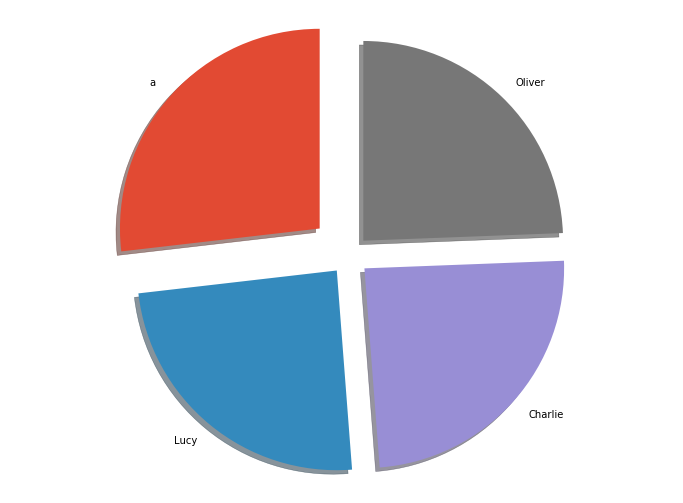

In [137]:
NameCount = list(df[df['name'] != 'None']['name'].value_counts())[0:4]
Names = df[df['name'] != 'None']['name'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(NameCount, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')